# Spectrogram Reading Lecture 9: Stops
1. Beatboxing
2. The parts of a stop
3. Some Bengali stops


## 1. Stop consonants and beatboxing

"Beatboxing" is a musical art form, in which phonetic transients are produced in a way that imitates the sound of a drum set.  The transient of a /p/ sounds rather like a muffled bass (no front cavity resonance), /k/ sounds rather like a snare (front cavity resonance at around 2000Hz), /t/ sounds rather like a high hat (front cavity resonance at around 4000Hz).

Let's look at this example: https://en.wikipedia.org/wiki/File:Beatboxset1_pepouni.ogg .  This basic stop transients are all there, but this artist uses a nasal /m/ to give his bass drum a less muffled effect; he uses a /ts/ to give a more resonant high hat, and a simple /s/ to create a high-hat swish.  He uses clicks, and humming, and well.  In the first 1.5 seconds shown below, he vocalizes an /ŋ/ while simultaneously generating three more /t/ burst.  Maybe he's just electronically edited two performances together, but if this is a real-time performance, it demonstrates really impressive articulatory control.

Let's just look at the first part, and identify a few of the stop bursts.

In [1]:
import spectrogram as sg
import soundfile as sf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Download the beatboxer
data1, fs1 = sg.download_audio('https://upload.wikimedia.org/wikipedia/commons/d/d3/Beatboxset1_pepouni.ogg')
# Save it locally
sf.write('beatboxer.wav',data1,fs1)
print('Downloaded a file with %d samples (%3.2f seconds at %d samples/second)' % (len(data1),len(data1)/fs1,fs1))

# Splice off the first 1.5 seconds, and save that too
x = data1[0:int(1.5*fs1)]
sf.write('beatboxstart.wav',x,fs1)

Downloaded a file with 4081664 samples (92.55 seconds at 44100 samples/second)


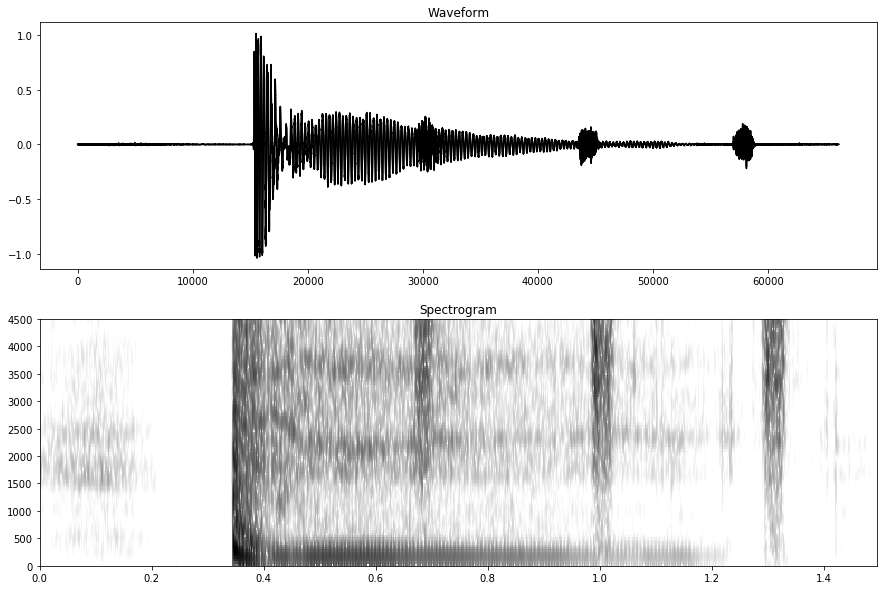

In [2]:
(S1,Ext1)=sg.readable_spectrogram(x,fs1)
plt.figure(figsize=(15,10))
plt.subplot(211)
plt.plot(x,'k')
plt.title('Waveform')
plt.subplot(212)
im1=plt.imshow(S1,origin='lower',extent=Ext1,aspect='auto')
im1.set_cmap('Greys')
plt.title('Spectrogram')


## 2. The parts of a stop
A stop consonant release is composed of five events, sequentially in time:
1. The closure
2. The transient (1ms)
3. The fricative burst (10ms)
4. The aspiration (50ms, if the stop is aspirated)
5. Formant transition, as the tongue moves toward the following vowel (70ms)
<img src="http://courses.engr.illinois.edu/ece590sip/sp2018/stoprelease.gif">

### 2.1 The transient

When the tongue first opens, airflow increases from 0 cc/second to about 10cc/second, in a total time of about 1ms.  That sudden increase of airflow causes a big spike in air pressure, proportional to 10cc/second/ms = 10000 cc/sec^2.  

In the beatboxing example above, the /t/ bursts don't show any clear transient, but you can see the /p/ transient very clearly as a vertical black line in the spectrogram at t=0.35.

Not every stop has a transient.  When it does occur, it's very short.  When it does occur, it has exactly the same resonant frequencies as...

### 2.2 The fricative burst

For the first 5-10ms after release, the tongue constriction is still tight enough to generate turbulence right there at the constriction.

In normal speech, this fricative transient disappears very quickly, because the speaker is done with the stop and is now trying to say the vowel.  In beatboxing, though, the speaker holds the tongue in position to get a longer fricative burst.  Sometimes the tongue is held there so long that you would call it an affricate instead of a stop.

(an affricate is just a stop consonant with an extra-long fricative burst.  Usually the frication needs to be at least 50ms for it to be heard as an affricate.  Sometimes the frication is a centimeter posterior to the stop, as in English "cha" and "ja", or German "pfa".  Other times they're in the same place, as in "tsa" and "dza").

The spectrum of the burst is exactly the same as the spectrum of the corresponding <a href="https://courses.engr.illinois.edu/ece590sip/sp2018/spectrograms7_fricatives.html">fricative</a>.  So, /p/ has energy at all frequencies; /k/ has a peak at around 2000Hz, and /t/ has a peak at around 4000Hz.

### 2.3 Aspiration

Aspiration is turbulence at the vocal folds.  Basically, it's as if you said the stop, then say a very short /h/ before you start the vowel.

An /h/ is produced in the same place as a vowel --- at your glottis --- therefore it has all of the same resonances.  F1 is only weakly excited, though, because the aspiration noise is flat, whereas vowel voicing is lowpass.  In the word "two" up above, you can see all of the formants (F1, F2, F3, and F4) all the way through the aspiration, but the F1 pattern is a little bit distorted by the aspiration; the patterns of the other formants are perfectly clear.

### 2.4 Formant transitions

Formant transitions start at the instant of the release, and continue until the tongue reaches its target.  That means that the transition continues through the frication (when you can't see it), and right through the aspiration (when you usually can see it, except that F1 may be wonky).

The formant transitions for a stop are exactly the same as for a <a href="https://courses.engr.illinois.edu/ece590sip/sp2018/spectrograms8_nasals.html">nasal</a>.  Thus, 
* a labial stop (/b/ or /p/) starts with F1=0, F2=1000, and F3=2000, then moves from those values toward the formants of the vowel.  
* An alveolar stop (/d/ or /t/) starts with F1=0, F2=1800, F3=3000.  
* A velar stop starts with F1=0, and F2=F3.  The actual value of F2=F3 varies, because in English, /q/ and /c/ are both considered allophones of /k/.  So you might see F2=F3=1400 (in front of /a/), or F2=F3=2300 (in front of /i/).

Here's how Delattre, Liberman and Cooper put it in 1955.  Oops, they left off F3.  Just imagine the F3 trace: coming up for /b/, coming down for /d/, and coming from F2 for /g/:
<img src="http://courses.engr.illinois.edu/ece590sip/sp2018/1955delattre.png" height=200>
Here's how the same authors put it in 1962.  Now they've included F3, but they forgot to include /g/.  Oh, well, I guess you can't have everything:
<img src="http://courses.engr.illinois.edu/ece590sip/sp2018/1962delattre.png" height=200>


## 3. Some Bengali stops

Rather than looking at wikipedia examples again, let's look at some Bengali data.  These examples are couplets written by Tagore, provided and transcribed phonetically by Mahir Morshed.  Download them, and let's look at them in Praat. 

Notice that Bengali has four voicing categories: (voiced,unvoiced)X(aspirated,unaspirated).  It also has four places of articulation: (labial,dental,retroflex,velar).

* <a href="http://courses.engr.illinois.edu/ece590sip/sp2018/spark108.wav">probʰat̪er pʰul pʰuʈija uʈʰuk ʃund̪ɔr porimole / ʃond̪ʰabɛlaj hok ʃe d̪ʰonːo mod̪ʰurɔʃe bʰɔra pʰɔle</a>
* <a href="http://courses.engr.illinois.edu/ece590sip/sp2018/spark73.wav">t̪ɔroŋger baɳi sind̪ʰu t͡ʃahe bud͡ʒʰabare / pʰenaje keboli lekʰe mut͡ʃʰe bare bare</a>
* <a href="http://courses.engr.illinois.edu/ece590sip/sp2018/spark60.wav">t͡ʃahit͡ʃʰo bare bare aponare ɖʰakit̪e / mon na mane mana mæle ɖana ãkʰite</a>
* <a href="http://courses.engr.illinois.edu/ece590sip/sp2018/spark52.wav">gat͡ʃʰer pat̪aj lekʰon lekʰe bɔʃont̪e bɔrʂaj / d͡ʒʰore pɔɽe ʃɔb kahini d̪ʰulaj miʃe d͡ʒaj</a>
* <a href="http://courses.engr.illinois.edu/ece590sip/sp2018/spark41.wav">kalo megʰ akaʃer t̪arad̪er ɖʰeke mon bʰabe d͡ʒit̪ holo t̪ar / megʰ kot̪ʰa mile d͡ʒaj t͡ʃihno nahi rekʰe t̪araguli rɔhe nirbikar</a>
